In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
np.random.seed(42)

%matplotlib inline

Yet another R run was needed

```
library(foreign)
write.csv(read.dta("./ARM_Data/earnings/heights.dta"), "./ARM_Data/earnings/heights.csv", row.names=FALSE)
```

In [5]:
earnings_df = pd.read_csv("./ARM_Data/earnings/heights.csv")

In [6]:
earnings_df.describe()

,earn,height1,height2,sex,race,hisp,ed,yearbn,height
count,1379.000000,2021.000000,2023.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2021.000000
mean,20014.858593,5.122217,5.186357,1.631345,1.187284,1.952686,13.307048,46.980286,66.561108
std,19763.754808,0.357946,4.349514,0.482559,0.675301,0.316740,3.726320,17.894844,3.819420
min,0.000000,4.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,57.000000
25%,6000.000000,5.000000,3.000000,1.000000,1.000000,2.000000,12.000000,34.000000,64.000000
50%,16400.000000,5.000000,5.000000,2.000000,1.000000,2.000000,12.000000,50.000000,66.000000
75%,28000.000000,5.000000,8.000000,2.000000,1.000000,2.000000,15.000000,60.000000,69.000000
max,200000.000000,6.000000,98.000000,2.000000,9.000000,9.000000,99.000000,99.000000,82.000000


In [8]:
earnings_df.head()

,earn,height1,height2,sex,race,hisp,ed,yearbn,height
0,NaN,5.0,6.0,2,1,2,12,53,66.0
1,NaN,5.0,4.0,1,2,2,12,50,64.0
2,50000.0,6.0,2.0,1,1,2,16,45,74.0
3,60000.0,5.0,6.0,2,1,2,16,32,66.0
4,30000.0,5.0,4.0,2,1,2,16,61,64.0


Some earnings are missing. Let's try those later as a test set for a model. For now we focus on the data with no missing values.

In [17]:
earnings_df_clean = earnings_df[~earnings_df.isna().any(axis="columns")]

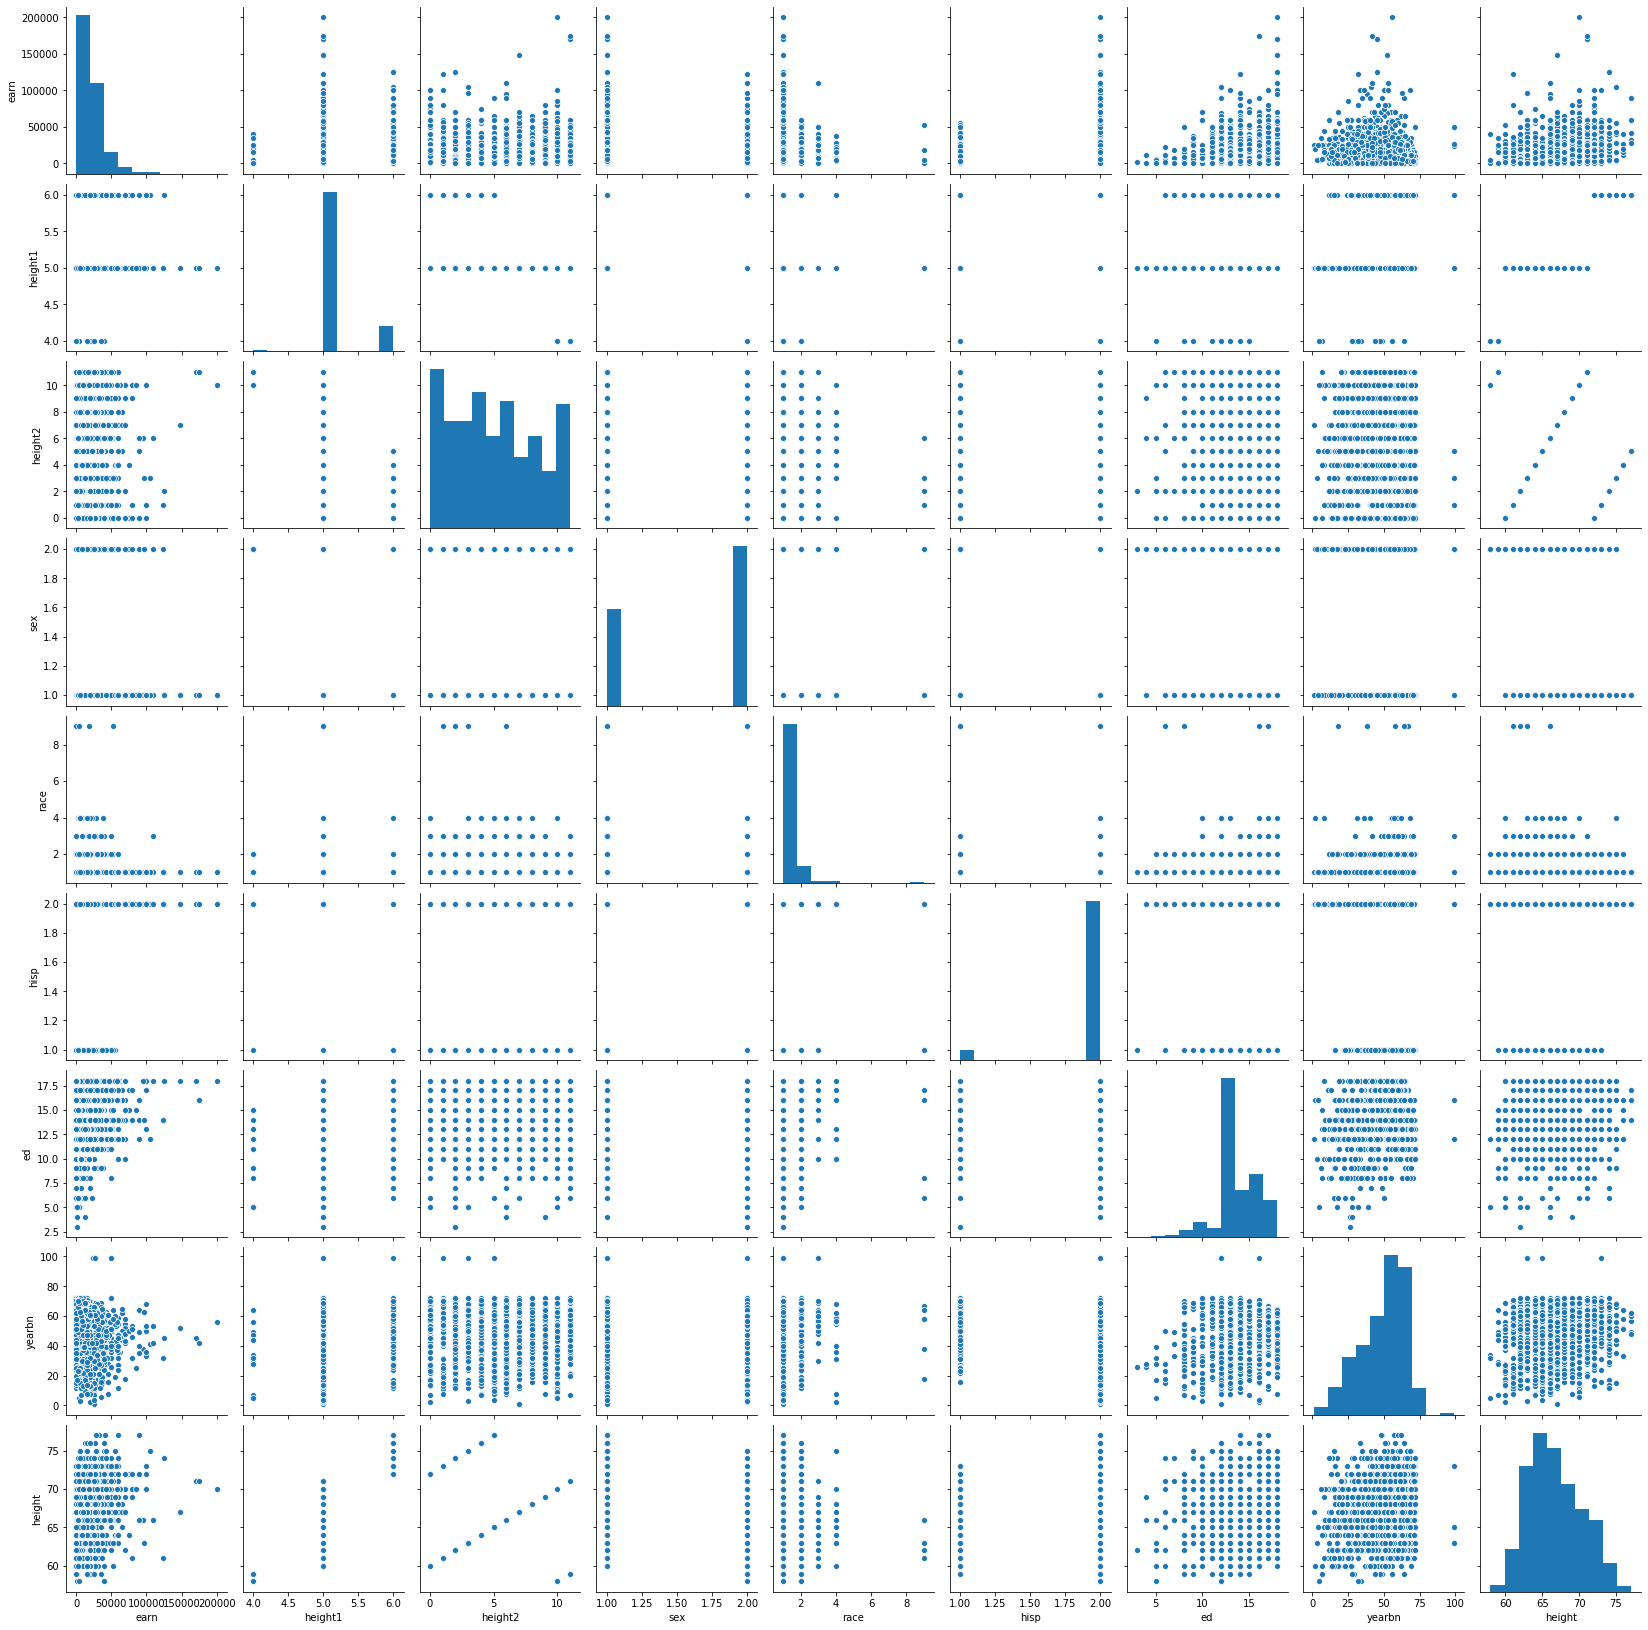

In [18]:
sns.pairplot(earnings_df_clean)

In [23]:
cmap=sns.diverging_palette(5, 250, as_cmap=True)
earnings_df_clean.corr().style.background_gradient(cmap, axis=1)

,earn,height1,height2,sex,race,hisp,ed,yearbn,height
earn,1.000000,0.188262,0.104418,-0.350971,-0.028104,0.055550,0.349466,-0.062982,0.301019
height1,0.188262,1.000000,-0.520676,-0.489513,-0.032153,0.002809,0.065947,0.118657,0.702267
height2,0.104418,-0.520676,1.000000,-0.179867,-0.037891,0.075760,0.044792,-0.002959,0.242146
sex,-0.350971,-0.489513,-0.179867,1.000000,0.012988,0.011734,-0.061747,-0.068779,-0.706286
race,-0.028104,-0.032153,-0.037891,0.012988,1.000000,-0.083289,0.002607,0.023085,-0.068136
hisp,0.055550,0.002809,0.075760,0.011734,-0.083289,1.000000,0.033553,-0.060889,0.066366
ed,0.349466,0.065947,0.044792,-0.061747,0.002607,0.033553,1.000000,0.129657,0.112295
yearbn,-0.062982,0.118657,-0.002959,-0.068779,0.023085,-0.060889,0.129657,1.000000,0.132380
height,0.301019,0.702267,0.242146,-0.706286,-0.068136,0.066366,0.112295,0.132380,1.000000
